In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import os
import glob

In [2]:
def clusterizar (sinal,n_link,n_c):
    clustering = AgglomerativeClustering(n_clusters=n_link,linkage="single").fit(sinal)
    clustering
    out_labels=clustering.labels_
    kmeans = KMeans(n_clusters=n_c, random_state=1, algorithm="auto").fit(out_labels.reshape(1,len(sinal)).T)
    out_labels_kmeans = kmeans.labels_
    return out_labels_kmeans

In [3]:
def mostra_resultados(sinal,preditor, idx):
    plt.figure(figsize=(20,10))
    plt.plot(preditor, color='r', label="Sinal direto identificado")
    plt.plot(sinal, color='b')
    plt.legend(prop={'size': 20})
    plt.savefig('imgs/' + str(idx) + '.png')

In [4]:
def janelamento(cluster,x,y):
    u = clusterizar(cluster,x,y)
    vet_aux = []
    existe_sinal = False
    
    for idx in range(len(u)):
        soma = np.sum(u[idx:idx+50])        
        if soma == 0:
            vet_aux.append(0)
        
        if soma != 0:
            existe_sinal = True
            vet_aux.append(1)
        
        if existe_sinal and soma == 0:
            break
            
    return vet_aux

In [5]:
def read_data(filename):
    data = pd.read_csv(filename, header=None, error_bad_lines=False, sep='\n').values
    return data[15:].astype(float)

In [6]:
path = os.path.join('Dados', '001.txt')
data = read_data(path)

In [7]:
medicoes_nao_tratadas = glob.glob('./Dados/[0-9]*.txt')
medicoes_tratadas = glob.glob('./Dados/e[0-9]*.txt')
novas_medicoes = glob.glob('./Dados/n[0-9]*.txt')

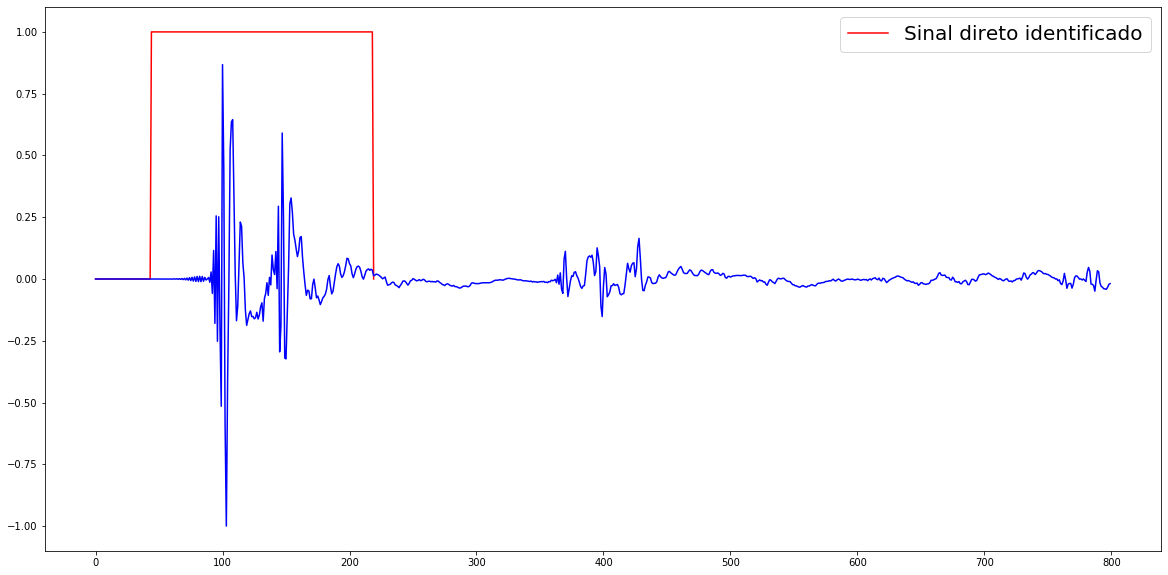

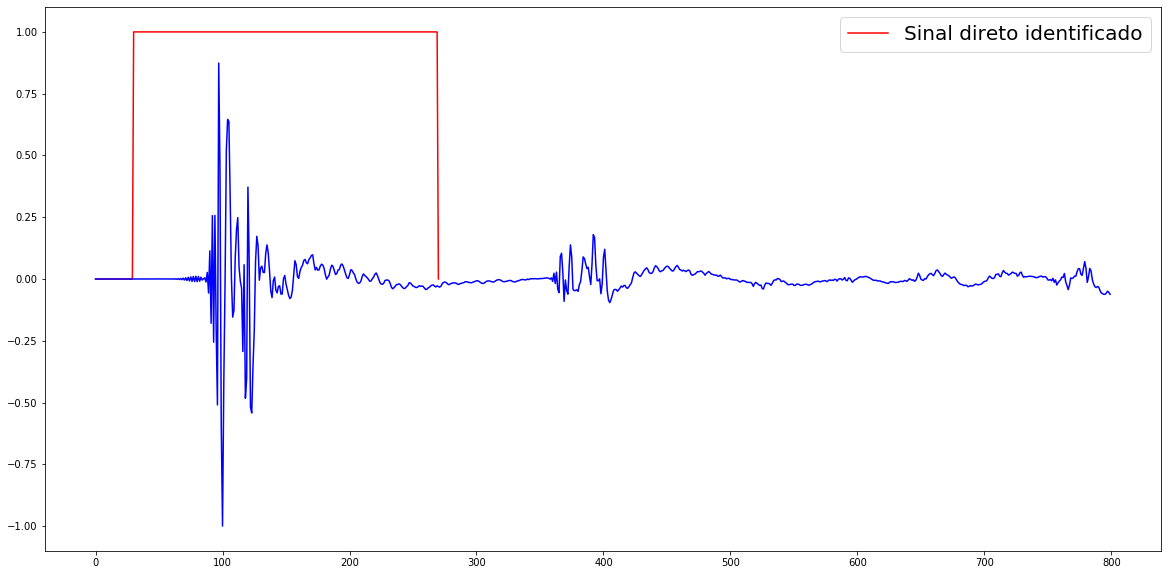

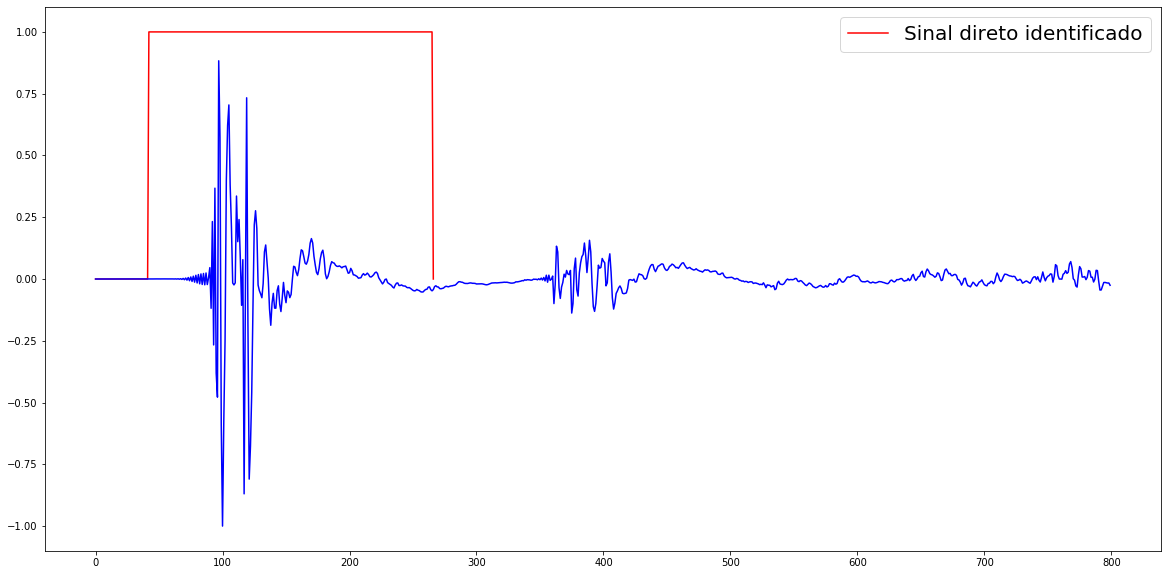

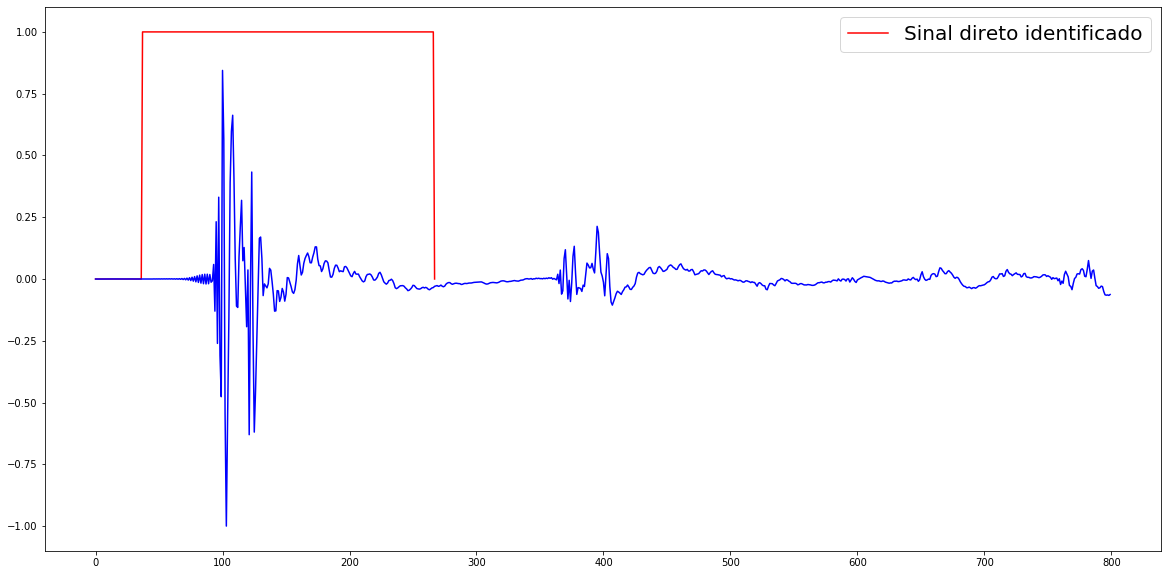

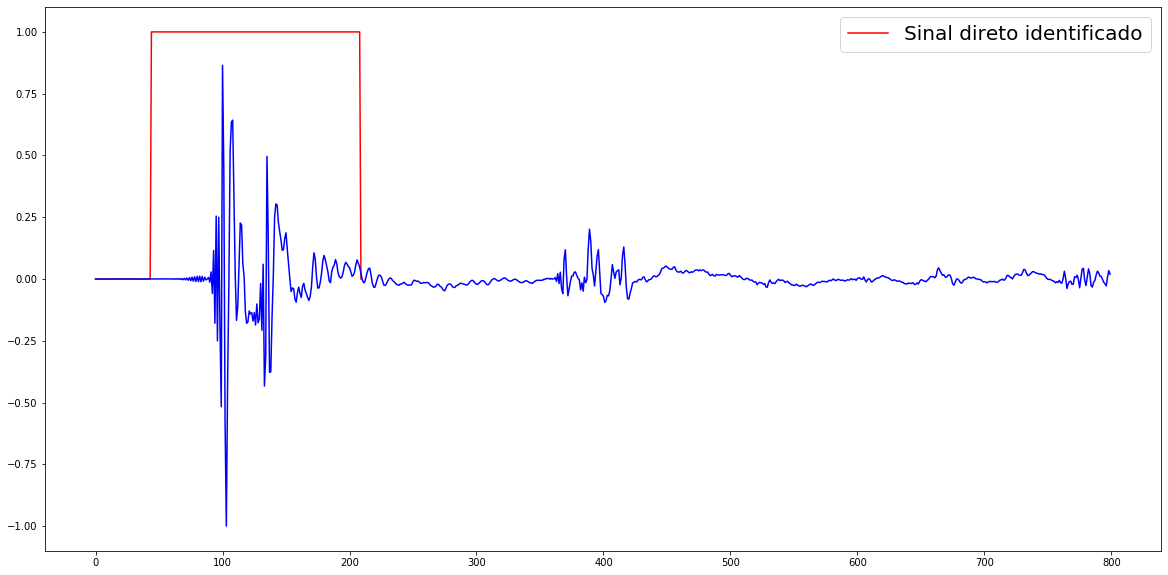

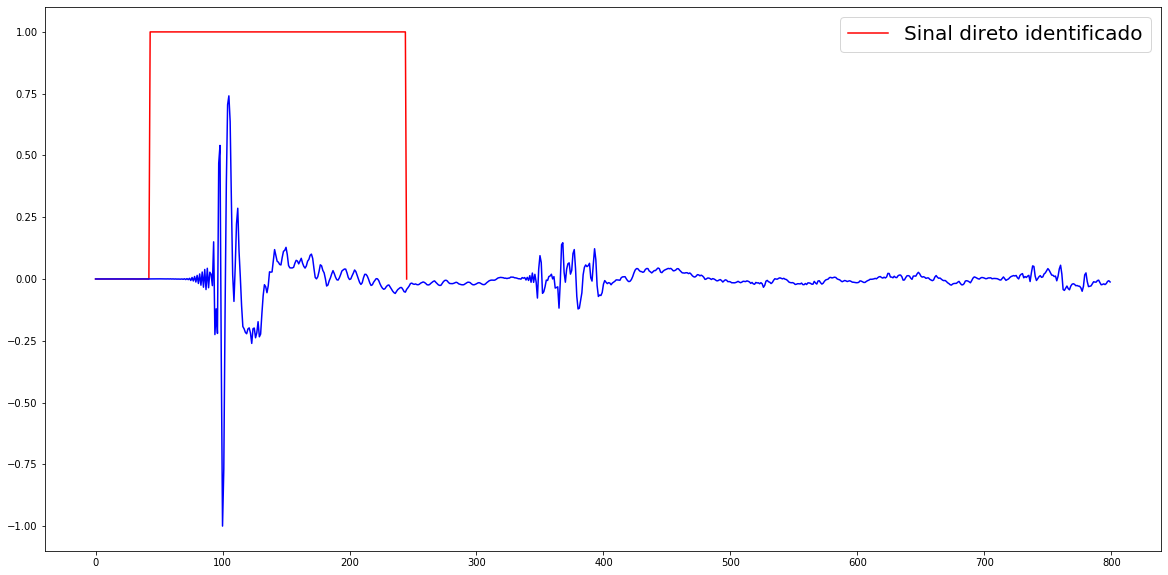

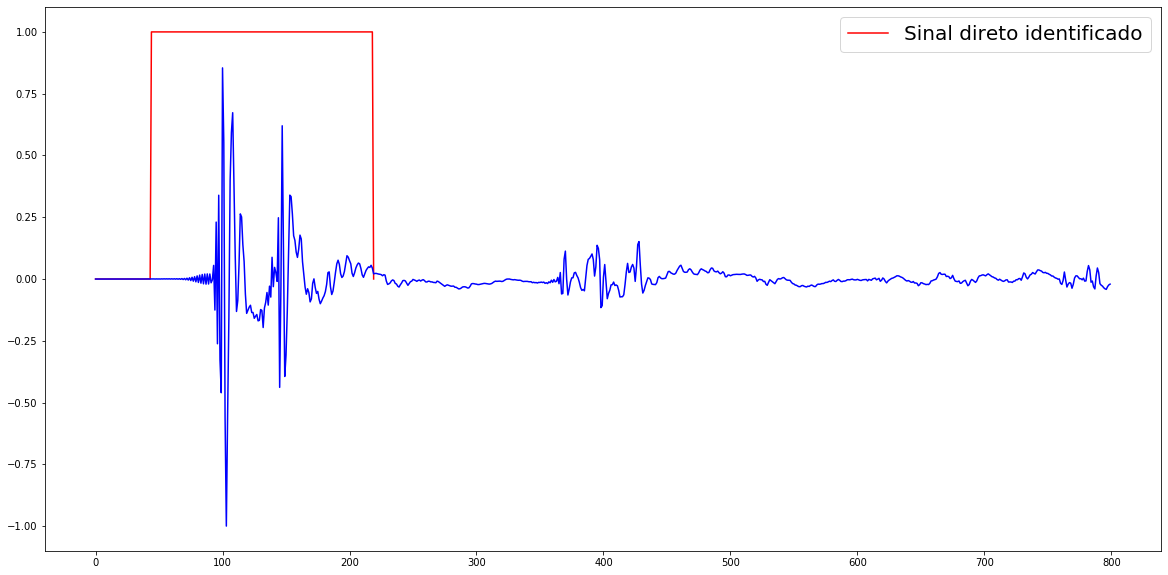

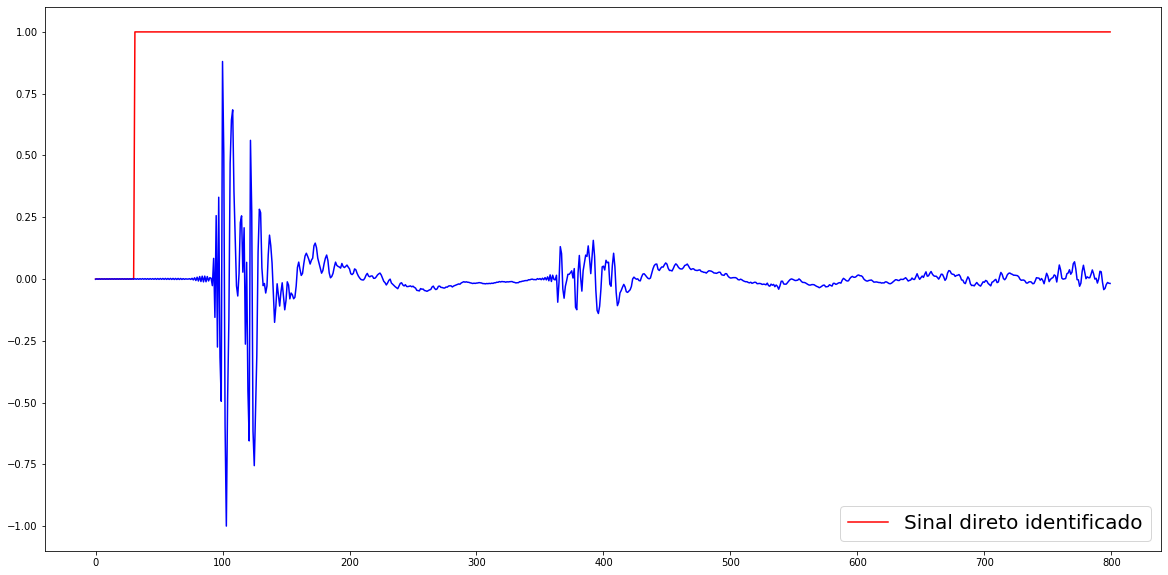

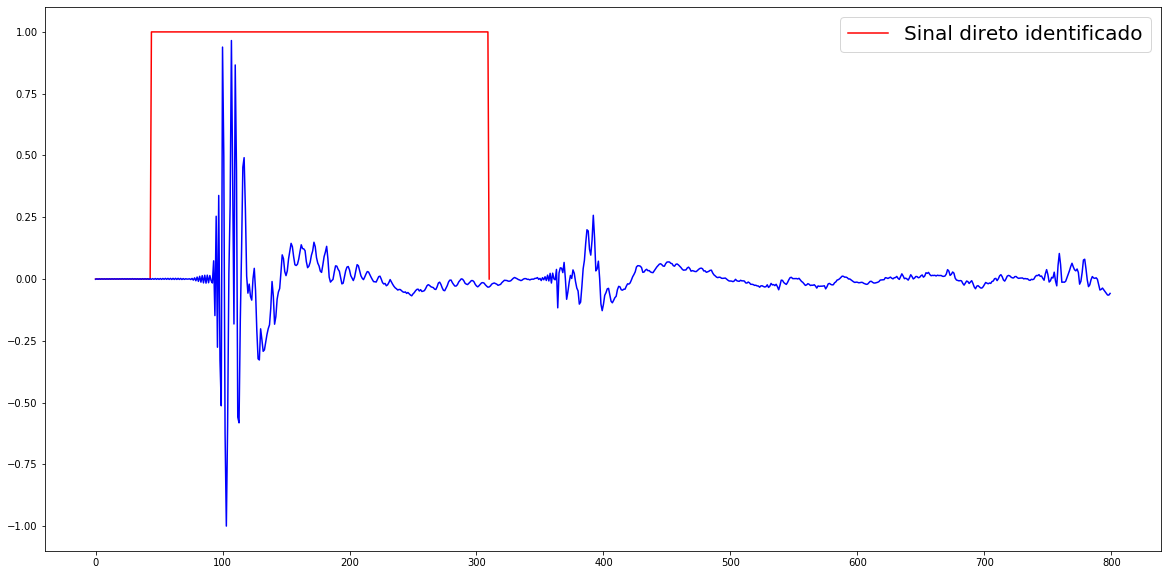

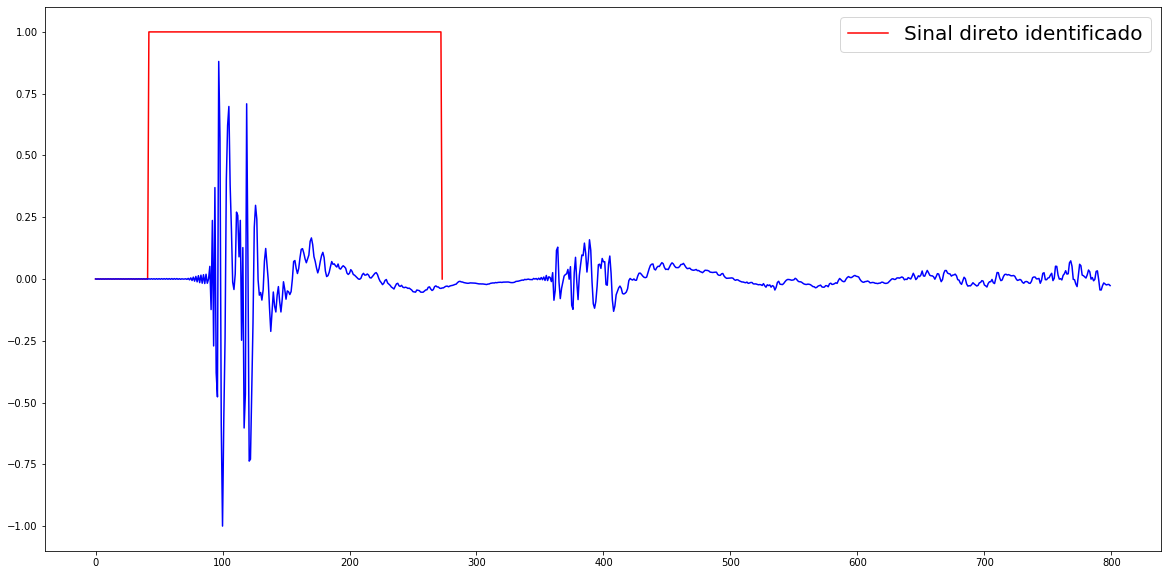

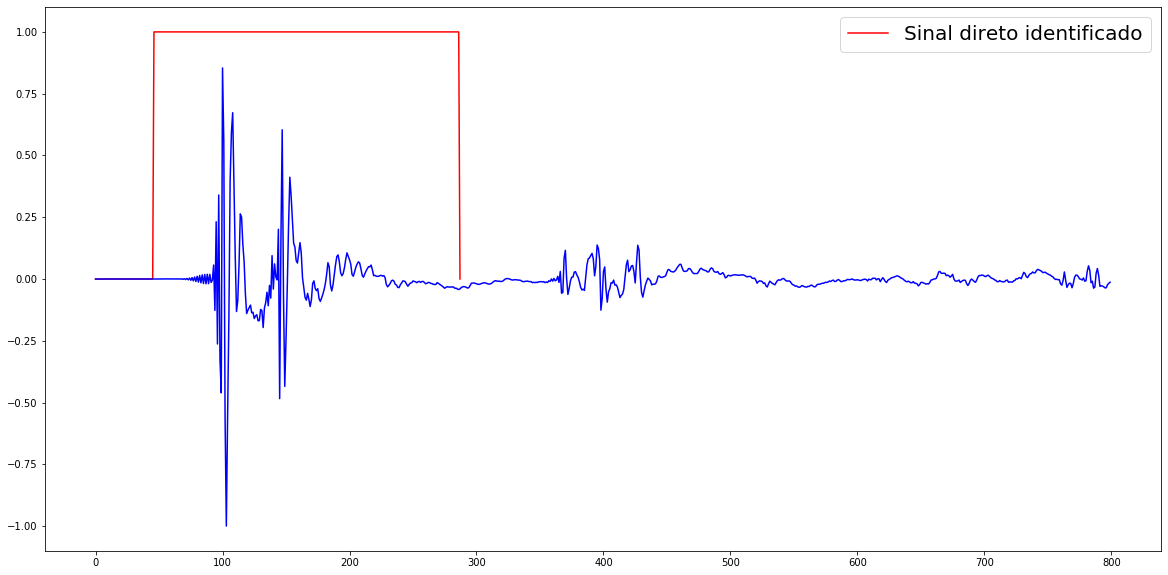

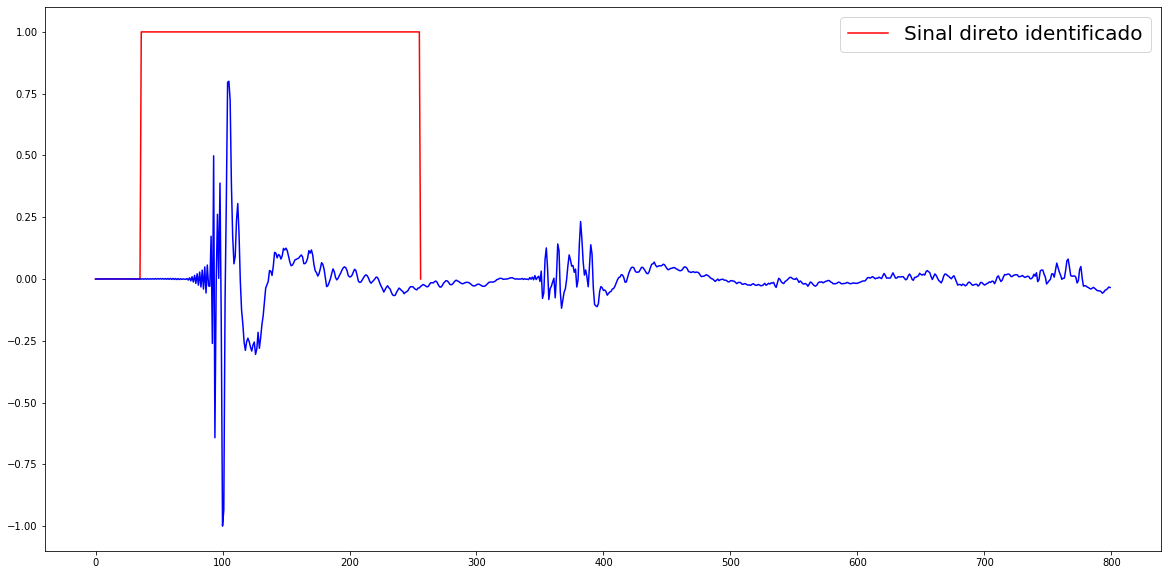

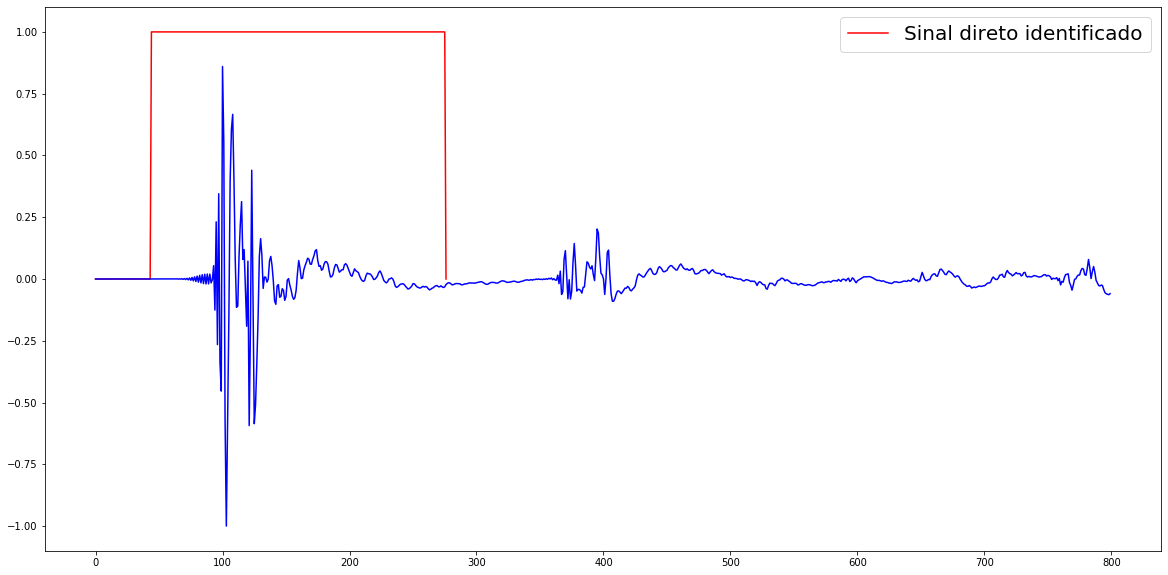

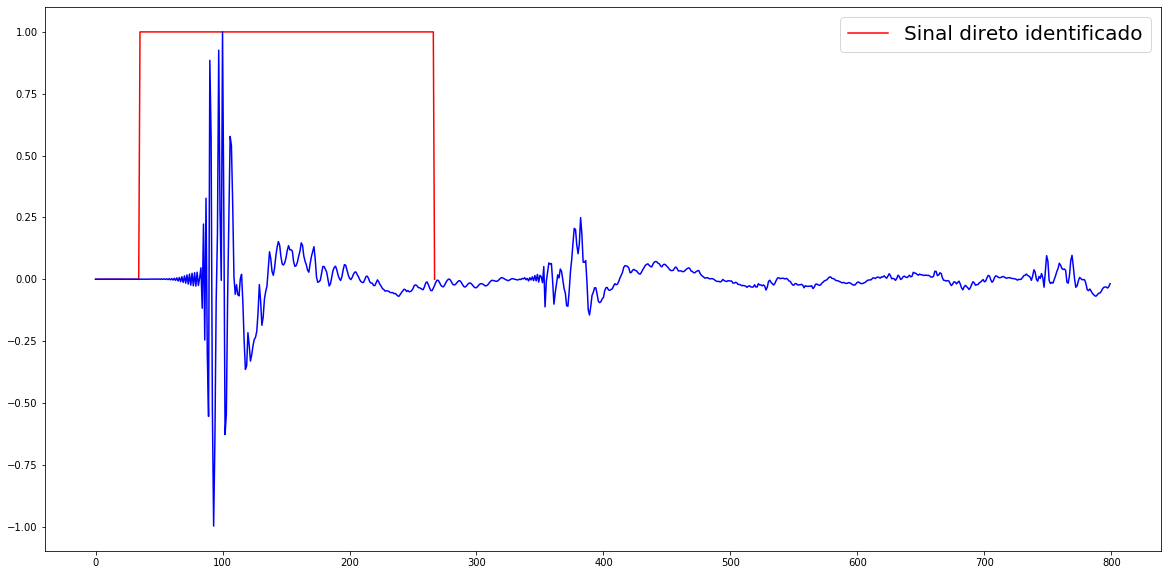

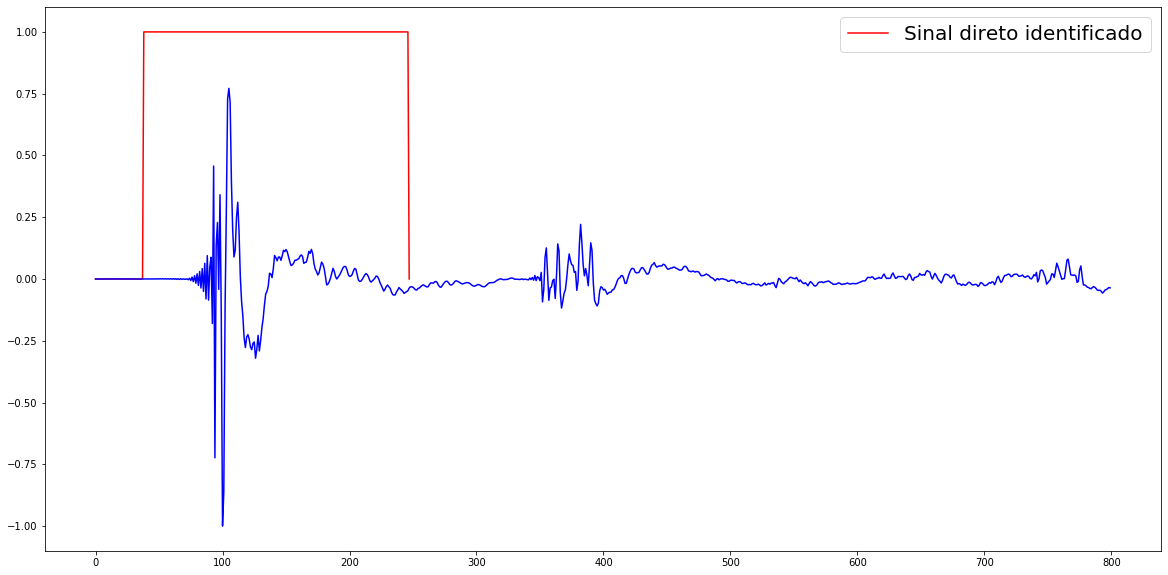

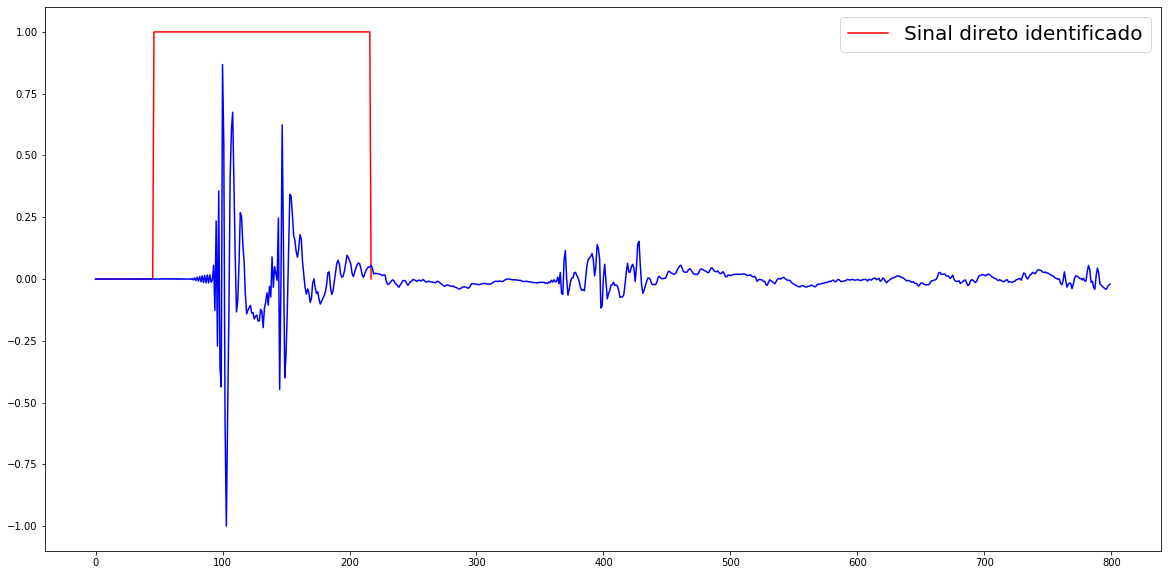

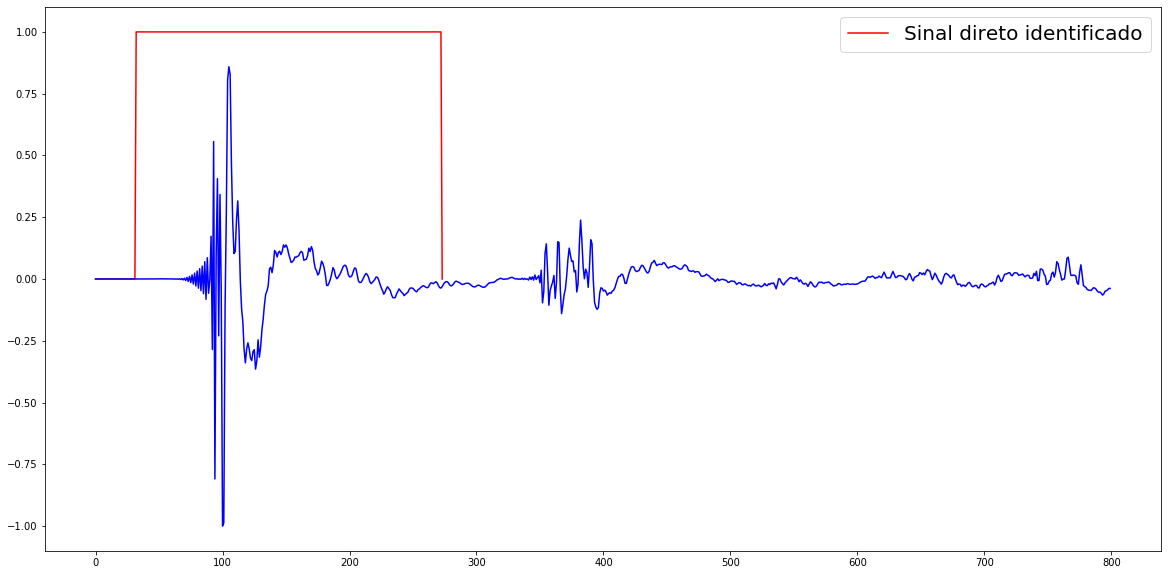

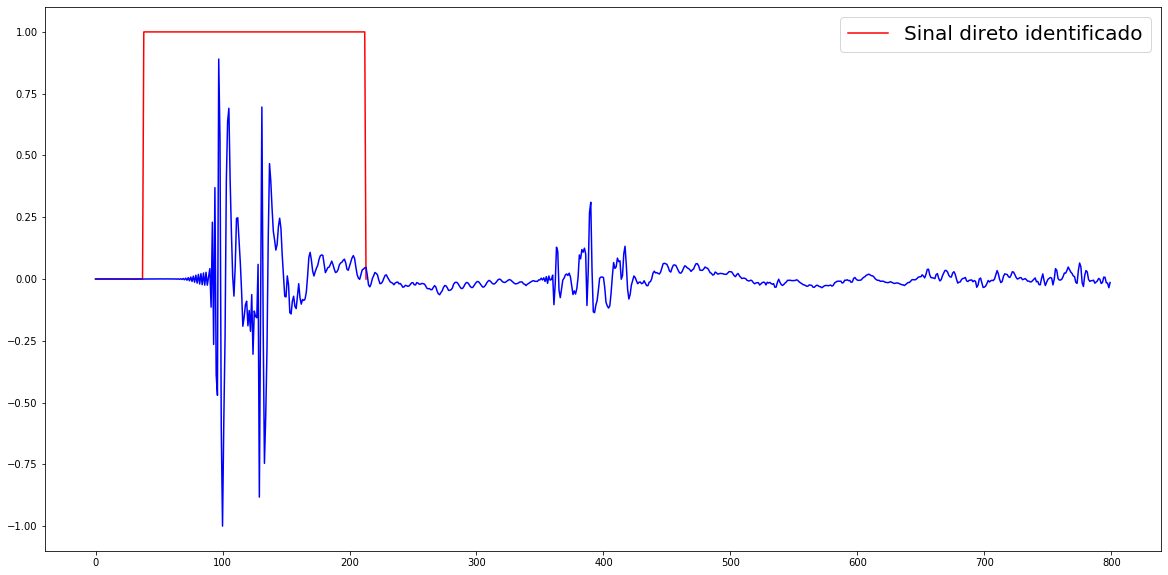

In [8]:
for file in medicoes_nao_tratadas:
    data = read_data(file)
    mostra_resultados(data[47900:48700],janelamento(data[47900:48700],121,2), file.split('.txt')[0].split('/')[-1])

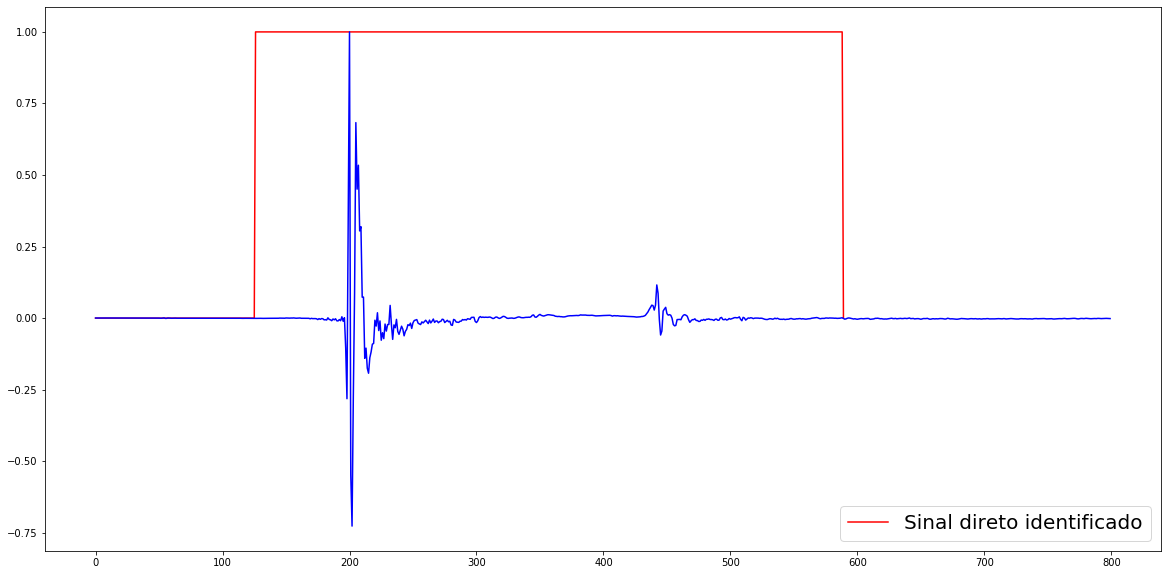

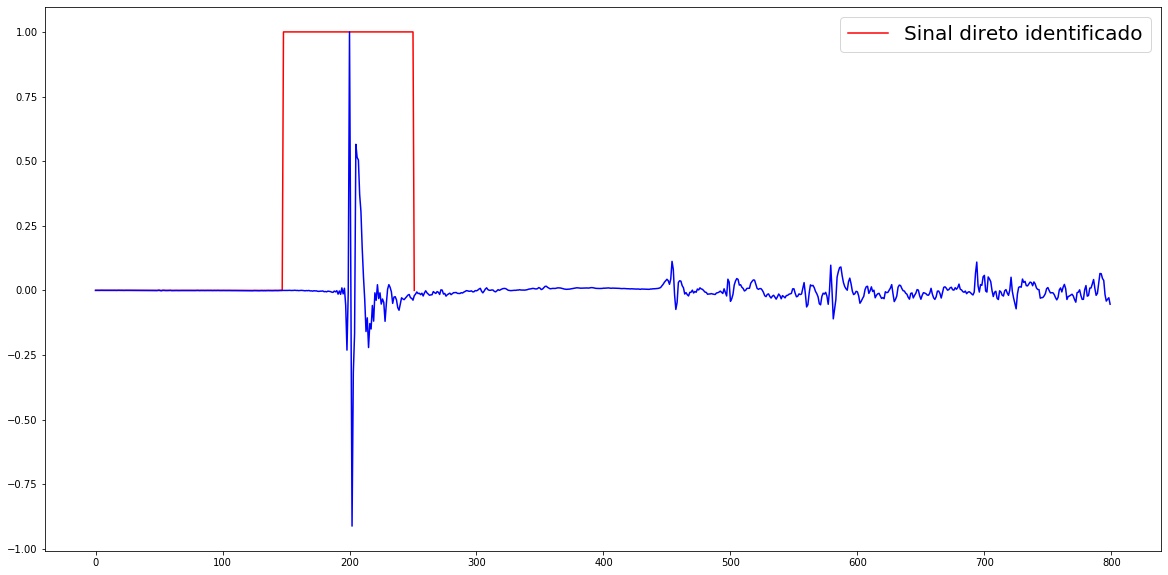

In [11]:
for file in novas_medicoes:
    data = read_data(file)
    mostra_resultados(data[43900:44700],janelamento(data[43900:44700],121,2), file.split('.txt')[0].split('/')[-1])